# Vektor

Kasus kesamaan dua item

<img src="https://miro.medium.com/max/1400/1*u5ARMm1aJERuzplAWIOAcA.png"></img>


In [74]:
import numpy as np

item_2 = np.array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0])
item_3 = np.array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0])

dot_product = item_2 @ item_3
cosine_sim = dot_product/(np.linalg.norm(item_2) * np.linalg.norm(item_3))

print('Dot Product:',dot_product)
print('Cosine Similarity:',cosine_sim)

Dot Product: 2
Cosine Similarity: 0.3086066999241838


Berdasarkan hasil cosine similaritynya, bahwa kesamaan antara item 2 dan item 3 hanya 30,86% yang artinya tidak begitu mirip.

# Matriks

In [75]:
!wget https://pbs.twimg.com/profile_images/1303645505465974785/BAedfmOT_400x400.jpg

'wget' is not recognized as an internal or external command,
operable program or batch file.


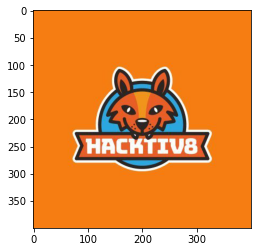

In [76]:
import numpy as np
import matplotlib.pyplot as plt

image = plt.imread('BAedfmOT_400x400.jpg')
plt.imshow(image)

In [77]:
image

array([[[246, 125,  18],
        [246, 125,  18],
        [246, 125,  18],
        ...,
        [246, 125,  18],
        [246, 125,  18],
        [246, 125,  18]],

       [[246, 125,  18],
        [246, 125,  18],
        [246, 125,  18],
        ...,
        [246, 125,  18],
        [246, 125,  18],
        [246, 125,  18]],

       [[246, 125,  18],
        [246, 125,  18],
        [246, 125,  18],
        ...,
        [246, 125,  18],
        [246, 125,  18],
        [246, 125,  18]],

       ...,

       [[246, 125,  18],
        [246, 125,  18],
        [246, 125,  18],
        ...,
        [246, 125,  18],
        [246, 125,  18],
        [246, 125,  18]],

       [[246, 125,  18],
        [246, 125,  18],
        [246, 125,  18],
        ...,
        [246, 125,  18],
        [246, 125,  18],
        [246, 125,  18]],

       [[246, 125,  18],
        [246, 125,  18],
        [246, 125,  18],
        ...,
        [246, 125,  18],
        [246, 125,  18],
        [246, 125,  18]]

In [78]:
image.shape

(400, 400, 3)

In [79]:
Red = image[:,:,0]
Green = image[:,:,1]
Blue = image[:,:,2]

print('Shape R:',Red.shape)
print('Shape G:',Green.shape)
print('Shape B:',Blue.shape)

Shape R: (400, 400)
Shape G: (400, 400)
Shape B: (400, 400)


Text(0.5, 1.0, 'Gambar Filter B')

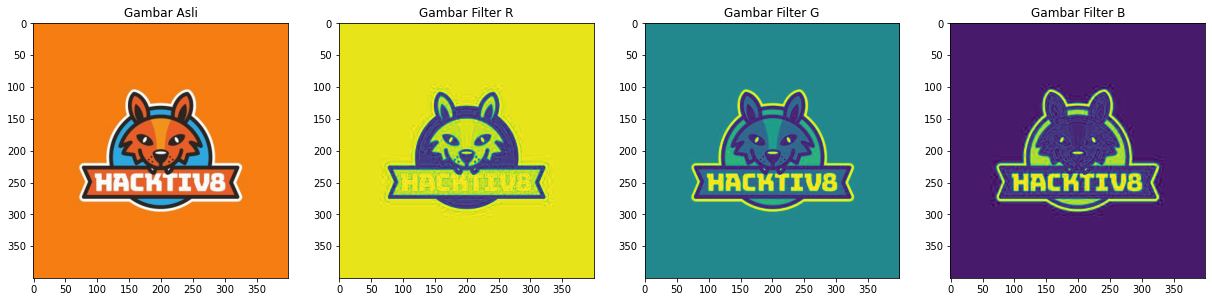

In [80]:
fig, ax = plt.subplots(ncols=4,figsize=(21,5))
ax[0].imshow(image)
ax[0].set_title('Gambar Asli')
ax[1].imshow(Red)
ax[1].set_title('Gambar Filter R')
ax[2].imshow(Green)
ax[2].set_title('Gambar Filter G')
ax[3].imshow(Blue)
ax[3].set_title('Gambar Filter B')

Tolong liat recording ya, De wkwkkwkw

### Transpose

Rotate 90 derajat, kolom jadi baris, baris jadi kolom.

subplots --> 3 plot dalam 1 kertas, ada 3 gambar, tidak otomatis harus diset dulu

Text(0.5, 1.0, 'Gambar Filter B')

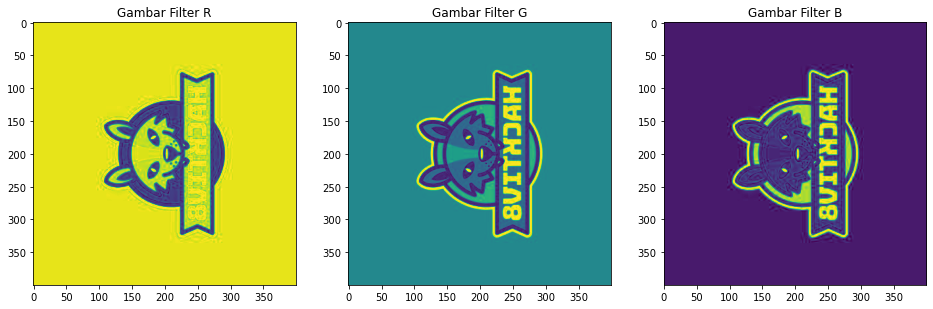

In [81]:
fig, ax = plt.subplots(ncols=3,figsize=(16,5))
ax[0].imshow(Red.T)
ax[0].set_title('Gambar Filter R')
ax[1].imshow(Green.T)
ax[1].set_title('Gambar Filter G')
ax[2].imshow(Blue.T)
ax[2].set_title('Gambar Filter B')

### Perkalian 2 Matrix

Text(0.5, 1.0, 'Gambar Red x Blue')

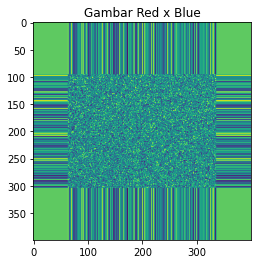

In [82]:
plt.imshow(Red @ Blue)
plt.title('Gambar Red x Blue')

Text(0.5, 1.0, 'Gambar Green x Matrix')

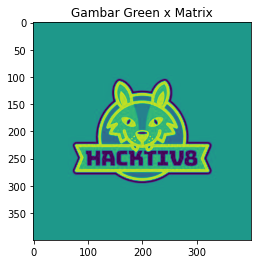

In [83]:
matrix = (-1)*np.eye(400)
gm = Green @ matrix
plt.imshow(gm)
plt.title('Gambar Green x Matrix')

Text(0.5, 1.0, 'Gambar Green x Matrix')

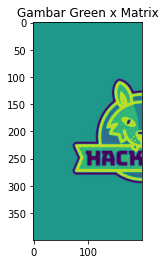

In [84]:
matrix = (-1)*np.eye(400)[:,:200]
gm = Green @ matrix
plt.imshow(gm)
plt.title('Gambar Green x Matrix')

# Eigendecomposition

In [85]:
import numpy as np

eig_val,eig_vec = np.linalg.eig(Green)

print('Eigen Vectors shape :', eig_vec.shape) #di dalam matriks ada 400 eigen vectors
print('Eigen Values shape :', eig_val.shape) #di dalam matriks ada 400 eigen value

Eigen Vectors shape : (400, 400)
Eigen Values shape : (400,)


Text(0.5, 1.0, 'Reconstructed Image')

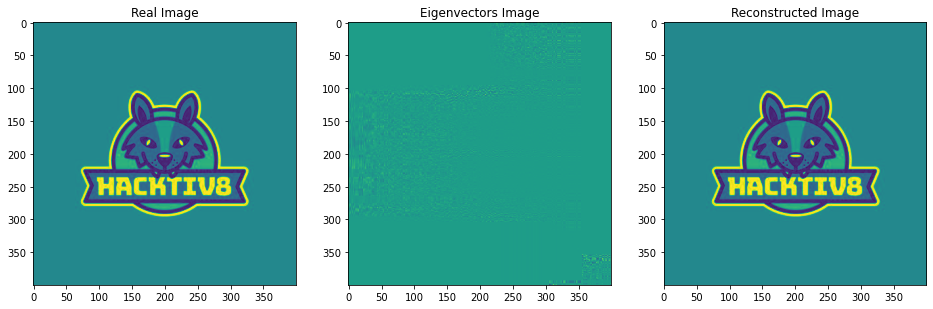

In [86]:
recon_img = eig_vec @ np.diag(eig_val) @ np.linalg.inv(eig_vec)

fig, ax = plt.subplots(ncols=3,figsize=(16,5))
ax[0].imshow(Green)
ax[0].set_title('Real Image')
ax[1].imshow(eig_vec.real)
ax[1].set_title('Eigenvectors Image')
ax[2].imshow(recon_img.real)
ax[2].set_title('Reconstructed Image')

### Influencer

<img src="5-Figure1-1.png"></img>

Jejaring sosial 7 orang yang berinteraksi satu sama lain

Notes : ada baiknya tiap value dikasih bobot sesuai dengan jumlah interaksi seseorang. Misal A ada 2 interaksi, masing2 value di baris A dibagi dengan 2. Dari itu baris, ke : kolom

In [87]:
# Menghitung Matriks COvariance
influencer = np.array([[0,1/2,1/2,0,0,0,0], #dari A
                       [0,0,0,0,0,1,0], #B
                       [1/2,0,0,0,1/2,0,0], #C
                       [0,0,1,0,0,0,0], #D
                       [1/3,0,1/3,0,0,0,1/3], #E
                       [0,0,0,0,1,0,0], #F
                       [0,0,0,0,0,0,0]]) #G

eigVal_inf,eigVec_inf = np.linalg.eig(influencer)


Output: menghitung pageRank

- cari eigen vector yang nilai eigval nya paling besar atau = 1
- cari nilai eigen vector yang paling besar, yang paling besar itu lah yang page rank nya bernilai paling tinggi dan merupakan influencer atau paling penting

In [88]:
for i, val in enumerate(eigVal_inf):
    print('eigVal ke', i, ':', val)

eigVal ke 0 : 0j
eigVal ke 1 : (0.907065432168817+0j)
eigVal ke 2 : (0.0918242117202569+0.5501093508690805j)
eigVal ke 3 : (0.0918242117202569-0.5501093508690805j)
eigVal ke 4 : (-0.5907138556093313+0j)
eigVal ke 5 : (-0.49999999999999983+0j)
eigVal ke 6 : 0j


eigen vector ke 1 adalah eigen vector yang memiliki nilai eigen terbesar, vektor inilah yang mengandung nilai page rank masing-masing orang/agen

In [89]:
abc = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
for i in range(7):
    print('Page Rank', abc[i], ':', eigVec_inf[1,i].real)

Page Rank A : 0.0
Page Rank B : -0.39385014988428996
Page Rank C : 0.6476541799414341
Page Rank D : 0.6476541799414341
Page Rank E : -0.2633313148349335
Page Rank F : -1.3875102811189076e-15
Page Rank G : 7.014589260031408e-292


Page Rank terbesar dimiliki oleh C dan D sehingga C dan D merupakan influencer di kelompok tersebut.

# Turunan

Text(0.5, 1.0, '$\\partial_y img$')

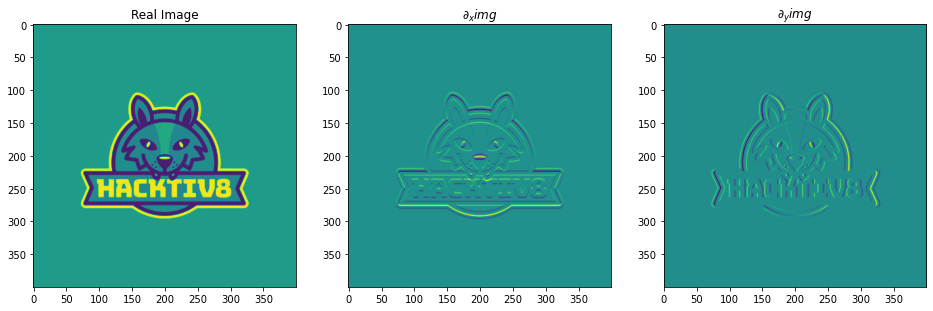

In [90]:
grey = 0.299*Red + 0.587*Green + 0.114*Blue

dx, dy = np.gradient(grey)

fig, ax = plt.subplots(ncols=3,figsize=(16,5))
ax[0].imshow(grey)
ax[0].set_title('Real Image')
ax[1].imshow(dx)
ax[1].set_title(r'$\partial_x img$')
ax[2].imshow(dy)
ax[2].set_title(r'$\partial_y img$')

In [91]:
eigVal_inf.shape

(7,)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'dz')

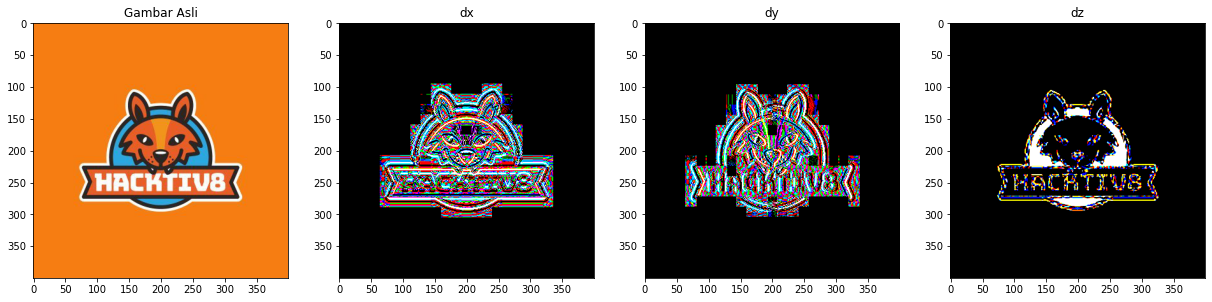

In [92]:
fig, ax = plt.subplots(ncols=4,figsize=(21,5))

dx, dy, dz = np.gradient(image)

ax[0].imshow(image)
ax[0].set_title('Gambar Asli')
ax[1].imshow(dx)
ax[1].set_title('dx')
ax[2].imshow(dy)
ax[2].set_title('dy')
ax[3].imshow(dz)
ax[3].set_title('dz')

Hitung turunan dari f(x) = 2x^2 + 5x

Berapa f'(x)?

In [93]:
# Mendefinisikan Fungsi f Menggunakan Sympy
import sympy as sy 

x = sy.Symbol('x')
f = 2*x**2 + 5*x
f

2*x**2 + 5*x

In [94]:
# Menghitung Turunan Pertama
print('Turunan dari', f, 'adalah')
f.diff()

Turunan dari 2*x**2 + 5*x adalah


4*x + 5

In [95]:
# Membuat Fungsi dari Turunan Pertama
def func(x):
    return 4*x + 5

print("f'(2) =", func(2)) # karena x=2

f'(2) = 13


# Integral

## Menghitung Total Pendapatan

Menghitung Total Pendapatan tahun 2019 di Supermarket Cabang Yangon

In [96]:
# Import Dataset dengan Pandas
import pandas as pd
import numpy as np
from scipy.integrate import trapz

data = pd.read_csv('https://raw.githubusercontent.com/fahmimnalfrzki/ds-masterclass-h8-vol2/main/data/supermarket_sales%20-%20Sheet1.csv')
data = data[data['City']=='Yangon'].sort_values(['Date','Time']).reset_index(drop=True)
data.head()

# reset_index : memungkinkan seseorang untuk melanjutkan metode rantai dan tetap bekerja dengan DataFrame

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.783,457.443,1/1/2019,10:39,Credit card,435.66,4.761905,21.783,6.9
1,651-88-7328,A,Yangon,Normal,Female,Fashion accessories,65.74,9,29.583,621.243,1/1/2019,13:55,Cash,591.66,4.761905,29.583,7.7
2,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,1/1/2019,14:42,Credit card,742.20,4.761905,37.110,4.3
3,530-90-9855,A,Yangon,Member,Male,Home and lifestyle,47.59,8,19.036,399.756,1/1/2019,14:47,Cash,380.72,4.761905,19.036,5.7
4,182-52-7000,A,Yangon,Member,Female,Sports and travel,27.04,4,5.408,113.568,1/1/2019,20:26,Ewallet,108.16,4.761905,5.408,6.9


<AxesSubplot:>

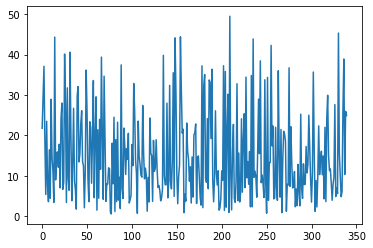

In [97]:
# Menampilkan data gross income diplot berdasarkan garis
data['gross income'].plot(kind='line')

trapz untuk menghitung integral dari data, yang diberikan menggunakan aturan trapesium komposit

In [98]:
# Menentukan x dan y
x = data.index # x nya index karena sudah urutan
y = data['gross income'] # y nya pendapatan, dilihat dari gross income

total_gross_income_2019 = trapz(y,x)
print('Total Gross Income in 2019 (Integral):',total_gross_income_2019)
print('Total Gross Income in 2019 (pd.Series.sum()):',data['gross income'].sum())
# pd.series.sum() : jumlah nilai di atas sumbu yang diminta

Total Gross Income in 2019 (Integral): 5033.7964999999995
Total Gross Income in 2019 (pd.Series.sum()): 5057.1605


## Menghitung luas negara Latvia

In [99]:
# Mengimport DataFrame menggunakan Pandas dan Numpy
import pandas as pd
import numpy as np

data_geo_map = pd.read_csv('world-administrative-boundaries.csv',delimiter=';')
data_geo_map.head()

,Geo Point,Geo Shape,Status,ISO 3 country code,Region of the territory,ISO 3 territory code,Continent of the territory,English Name,ISO 3166-1 Alpha 2-Codes,French Name
0,"-13.758363800617005,-172.15946443455022","{""coordinates"": [[[[-171.42919999999992, -14.0...",Member State,WSM,Polynesia,WSM,Oceania,Samoa,WS,Samoa
1,"50.64285116363036,4.663989187136792","{""coordinates"": [[[6.011800000000051, 50.75727...",Member State,BEL,Western Europe,BEL,Europe,Belgium,BE,Belgique
2,"23.8432324523914,90.26849814842937","{""coordinates"": [[[[91.89749000000006, 21.4766...",Member State,BGD,Southern Asia,BGD,Asia,Bangladesh,BD,Bangladesh
3,"31.35845585522365,34.96581019771595","{""coordinates"": [[[35.62364000000008, 33.24573...",Member State,ISR,Western Asia,ISR,Asia,Israel,IL,Israël
4,"64.44817113990821,14.084800836706723","{""coordinates"": [[[[5.287780000000055, 59.2188...",Member State,NOR,Northern Europe,NOR,Europe,Norway,NO,Norvège


In [100]:
Latvia = data_geo_map[data_geo_map['English Name']=='Latvia']['Geo Shape'].iloc[0]
# Menampilkan Geo shape yang Nama inggrisnya = latvia
Latvia

'{"coordinates": [[[27.37206000000009, 57.53564000000006], [27.425000000000068, 57.53194000000008], [27.44944000000004, 57.53110000000004], [27.471660000000043, 57.53138000000007], [27.54722000000004, 57.53639000000004], [27.542770000000075, 57.49361000000005], [27.52777000000009, 57.444330000000036], [27.571390000000065, 57.41819000000004], [27.60639000000009, 57.41055000000006], [27.68722000000008, 57.37999000000008], [27.825280000000078, 57.32388000000003], [27.85534000000007, 57.30597000000006], [27.86388000000005, 57.262500000000045], [27.84937000000008, 57.17992000000004], [27.77472000000006, 57.057210000000055], [27.70166000000006, 56.91471000000007], [27.731100000000083, 56.86916000000008], [27.762500000000045, 56.87361000000004], [27.802500000000066, 56.878190000000075], [27.837780000000066, 56.87555000000003], [27.860550000000046, 56.86888000000005], [27.938810000000046, 56.82242000000008], [27.926730000000077, 56.794020000000046], [27.943610000000035, 56.72276000000005], [28

In [101]:
# Mendefinisikan latvia_koor Menggunakan literal_eval
from ast import literal_eval

# Literal_eval mengevaluasi string dengan ekspresi yang hanya mengandung literal
latvia_coor_dict = literal_eval(Latvia)

# Membuat matriks latvia_coor
latvia_coor = np.array(latvia_coor_dict['coordinates'])


In [102]:
# Transpose Baris ke Kolom, Kolom ke Baris
latvia_coor = latvia_coor.reshape(latvia_coor.shape[1],latvia_coor.shape[2]).T

# Longitude : bujur : X
# Latitute : Lintang : Y

#Mendefinisikan DataFrame Latvia_coor
latvia_coor = pd.DataFrame({'long':latvia_coor[0],'lat':latvia_coor[1]})
# pd.DataFrame({'nama kolom X':latvia_coor[0], 'nama kolom Y' : latvia_coor[1]})

latvia_coor.head()

,long,lat
0,27.37206,57.53564
1,27.42500,57.53194
2,27.44944,57.53110
3,27.47166,57.53138
4,27.54722,57.53639


Untuk menghitung luas daerah, atau sutau bangun yang acak, bisa menganggap daerah itu sebagai dua kurva, dibagi dua, atas dan bawah, jadi luas atas - luas bawah.

Luas Daerah : integral atas - integral bawah

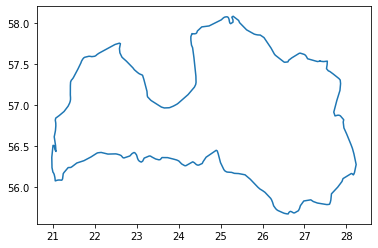

In [103]:
# Menghitung Luas Negara

# Import matplotlib
import matplotlib.pyplot as plt

# memplotkan Latvia_cor.kolomX,latvia_coor.kolomY)
plt.plot(latvia_coor.long,latvia_coor.lat)

In [104]:
# Nilai Batasnya menggunakan Median, yang diatas median = utara, yang dibawah median = selatan

median = latvia_coor.lat.median()

In [105]:
# Import trapz
from scipy.integrate import trapz

#diurutkan terlebih dahulu yang mana yang lebih besar
latvia_coor_sorted = latvia_coor.sort_values('long',ascending=True) #diurutkan yang paling besar, makanya ascending = True

#Menghitung luas daerah selatan dan utara masing-masing
northern = latvia_coor_sorted[latvia_coor_sorted.lat >= median] #lebih dari
southern = latvia_coor_sorted[latvia_coor_sorted.lat < median] #kurang dari

# Mencari integral dari data menggunakan trapz
area_N = trapz(northern.lat,northern.long) #trapz(Y,X)
area_S = trapz(southern.lat,southern.long) #trapz(Y,X)

# Mencari Luas Daerah
print('Luas area Latvia:',np.abs(area_N - area_S))
#np.abs = agar nilainya absolut, karena bisa aja nilainya minus

Luas area Latvia: 11.825908393001555
